In [1]:
import torch
import pandas as pd 
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import Dataset, DataLoader

In [2]:
salary_pdf = pd.read_csv("salary_dataset.csv")
salary_pdf = salary_pdf[['YearsExperience', 'Salary']]
salary_pdf.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [3]:
class SalaryDataset(Dataset):
    def __init__(self, pdf, feature_cols=None, target_col="Salary"):
        if feature_cols is None:
            feature_cols = [c for c in salary_pdf.columns if c != target_col]

        self.X = torch.tensor(salary_pdf[feature_cols].values, dtype=torch.float32)
        self.y = torch.tensor(salary_pdf[target_col].values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [4]:
dataset = SalaryDataset(salary_pdf)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [6]:
model = LinearRegressionModel(input_dim=dataset.X.shape[1])

criterion = nn.MSELoss()            
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

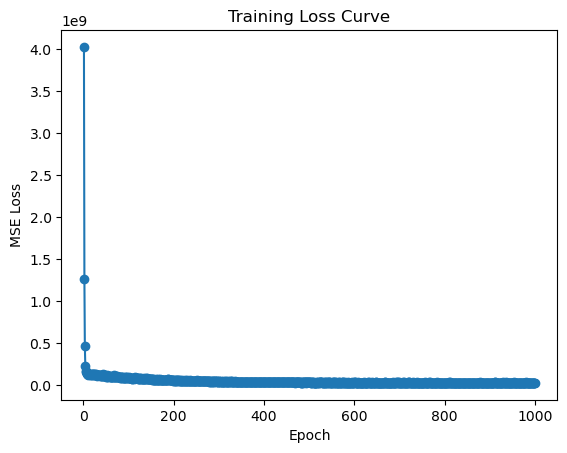

In [7]:
losses = []

epochs = 1000
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_X, batch_y in loader:
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(loader)
    losses.append(avg_loss)


plt.plot(range(1, epochs+1), losses, marker="o")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()

In [8]:
test_input = torch.tensor([[5]], dtype=torch.float32)
predicted_salary = model(test_input).item()
print(f"Predicted salary for 5 years experience: {predicted_salary:.2f}") 

Predicted salary for 5 years experience: 71513.14
